### This script contains the following:
#### 1. Import data and libraries
#### 2. Data wrangling and cleaning
#### 3. Plotting a choropleth
#### 4.Observations

### 1. Import data and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [3]:
# Importing customed json file for Europe, Asia, Australia and Africa
countries_geo = r'/Users/a/Desktop/countries.geo.json'

In [4]:
countries_geo 

'/Users/a/Desktop/countries.geo.json'

In [29]:
# Checking json file contents
f = open(r'/Users/a/Desktop/countries.geo.json',)
  
data = json.load(f)
  
for i in data['features']:
    print(i)

{'type': 'Feature', 'properties': {'scalerank': 1, 'featurecla': 'Admin-0 country', 'labelrank': 4, 'sovereignt': 'Bahrain', 'sov_a3': 'BHR', 'adm0_dif': 0, 'level': 2, 'type': 'Sovereign country', 'admin': 'Bahrain', 'adm0_a3': 'BHR', 'geou_dif': 0, 'geounit': 'Bahrain', 'gu_a3': 'BHR', 'su_dif': 0, 'subunit': 'Bahrain', 'su_a3': 'BHR', 'brk_diff': 0, 'name': 'Bahrain', 'name_long': 'Bahrain', 'brk_a3': 'BHR', 'brk_name': 'Bahrain', 'brk_group': None, 'abbrev': 'Bahr.', 'postal': 'BH', 'formal_en': 'Kingdom of Bahrain', 'formal_fr': None, 'note_adm0': None, 'note_brk': None, 'name_sort': 'Bahrain', 'name_alt': None, 'mapcolor7': 1, 'mapcolor8': 1, 'mapcolor9': 1, 'mapcolor13': 9, 'pop_est': 727785, 'gdp_md_est': 26820, 'pop_year': -99, 'lastcensus': 2010, 'gdp_year': -99, 'economy': '6. Developing region', 'income_grp': '2. High income: nonOECD', 'wikipedia': -99, 'fips_10': None, 'iso_a2': 'BH', 'iso_a3': 'BHR', 'iso_n3': '048', 'un_a3': '048', 'wb_a2': 'BH', 'wb_a3': 'BHR', 'woe_id'

In [5]:
path = r'/Users/a/Career Foundry/Achievement 6/02 Data/02 Prepared Data'

In [6]:
path

'/Users/a/Career Foundry/Achievement 6/02 Data/02 Prepared Data'

In [8]:
# Importing dataset
df = pd.read_csv(os.path.join(path, 'df_cleaned.csv'), index_col = False)

In [9]:
df.head()

Unnamed: 0  Region  Country     City  Month  Day  Year  AvgTemperature
0           0  Africa  Algeria  Algiers      1    1  1995            64.2
1           1  Africa  Algeria  Algiers      1    2  1995            49.4
2           2  Africa  Algeria  Algiers      1    3  1995            48.8
3           3  Africa  Algeria  Algiers      1    4  1995            46.4
4           4  Africa  Algeria  Algiers      1    5  1995            47.9

In [11]:
df.shape

(2906327, 8)

### 2. Data Wrangling and Cleaning

there are no dummy columns

In [18]:
#Checking for missing values
df.isnull().sum()


Unnamed: 0        0
Region            0
Country           0
City              0
Month             0
Day               0
Year              0
AvgTemperature    0
dtype: int64

In [19]:
#Checking for duplicates
dups = df.duplicated()

In [20]:
dups.shape

(2906327,)

There are no duplicates

<AxesSubplot:xlabel='Month', ylabel='Count'>

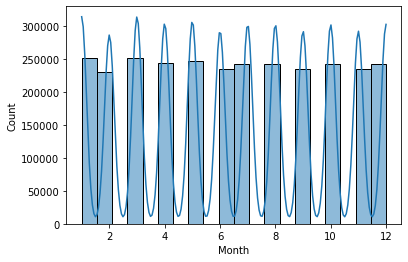

In [21]:
# Extreme values checks for Month
sns.histplot(df['Month'], bins=20, kde = True) 

In [25]:
# Check how many extreme values

df[df['Month'] >1000]

Empty DataFrame
Columns: [Unnamed: 0, Region, Country, City, Month, Day, Year, AvgTemperature]
Index: []

There are no extreme values for the column month

<AxesSubplot:xlabel='Year', ylabel='Count'>

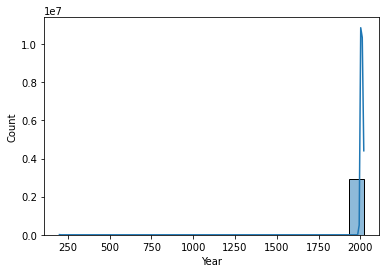

In [22]:
# Extreme values checks for Year
sns.histplot(df['Year'], bins=20, kde = True) 

<AxesSubplot:xlabel='AvgTemperature', ylabel='Count'>

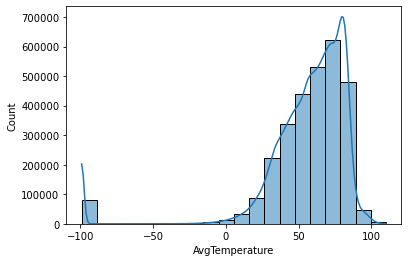

In [23]:
# Extreme values checks for AvgTemperature
sns.histplot(df['AvgTemperature'], bins=20, kde = True) 

### 3. Creating a choropleth

In [32]:
# Creating a subset with only the variables we want to display in the map
data_to_plot = df[['Country','AvgTemperature']]
data_to_plot.head()

Country  AvgTemperature
0  Algeria            64.2
1  Algeria            49.4
2  Algeria            48.8
3  Algeria            46.4
4  Algeria            47.9

In [37]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = countries_geo, 
    data = data_to_plot,
    columns = ['Country','AvgTemperature'],
    key_on = 'feature.properties.name', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = 'AvgTemperature').add_to(map)
folium.LayerControl().add_to(map)

map

In [38]:
map.save('plot_data.html')

### 4. Observations

The lowest temperature has been recorded in Thailand
The highest temperature has been recorded mostly in african regions, Saudi Arabia, India and Kazkastan